# K NEAREST NEIGHBOUR

## Importing The Libraries & Dataset

In [31]:
# IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [44]:
# TO AVOID EXPONENTIAL VALUES

np.set_printoptions(suppress = True)

In [32]:
# IMPORTING THE DATASET

data = pd.read_csv('Social_Network_Ads.csv')

In [33]:
# CHECKING THE HEAD OF DATASET

data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [34]:
# SEPARATING THE DEPENDENT AND INDEPENDENT VARIABLES

X = data.iloc[:,:-1].values                       # INDEPENDENT VARIABLES
y = data.iloc[:,-1].values.reshape(400,1)         # DEPENDENT VARIABLES   

## Dividing Data Into Train Test Split


In [35]:
# IMPORTING THE train_test_split

from sklearn.model_selection import train_test_split

# DIVIDING DATA INTO TRAINING AND TESTING DATA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
# CHECKING THE X_train

X_train

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000],
       [    42,  64000],
       [    37, 146000],
       [    23,  48000],
       [    25,  33000],
       [    24,  84000],
       [    27,  96000],
       [    23,  63000],
       [    48,  33000],
       [    48,  90000],
       [    42, 104000],
       [    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],


In [37]:
# CHECKING ELEMENT AT FIRST INDEX OF X_train

X_train[0]

array([    58, 144000], dtype=int64)

In [38]:
# CHEKING THE X_test

X_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


## Feature Scaling Of Independent Variables

In [39]:
# IMPORTING THE StandardScaler CLASS FOR FEATURE SCALING

from sklearn.preprocessing import StandardScaler

# CREATING AN INSTANCE OF StandardScaler CLASS

sc = StandardScaler()

In [40]:
# FEATURE SCALING OF X_train

X_train = sc.fit_transform(X_train)

In [41]:
# FEATURE SCALING X_test

X_test = sc.fit_transform(X_test)

## Creating, Training & Making Predictions From The Model


In [46]:
# IMPORTING THE KNeighborsClassifier CLASS

from sklearn.neighbors import KNeighborsClassifier

# CREATING AN INSTANCE OF KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)

In [52]:
# TRAINING THE MODEL TO TRAINING DATA

classifier.fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
# GETTING PREDICTION FORM OUT MODEL

y_pred = classifier.predict(X_test)

In [67]:
# MAKING PREDICTION ON SINGLE DATA POINT

classifier.predict(sc.transform([[30, 87000]]))

array([1], dtype=int64)

## Evaluating The Classifier

In [68]:
# IMPORTING THE METRICS FOR CLASSIFICATION THE ACCURACY, CONFUSION MATRIX, & CLASSIFICATION REPORT

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
# PRINTING THE ACCURACY SCORE, CONFUSION MATRIX, & CLASSIFICATION REPORT

print("The Accuracy Score Is: ", accuracy_score(y_pred, y_test))
print("\n")
print("The Confusion Matrix Is: ","\n","\n",confusion_matrix(y_pred, y_test))
print("\n")
print("The Classification Report is: ","\n","\n",classification_report(y_pred, y_test))

The Accuracy Score Is:  0.9375


The Confusion Matrix Is:  
 
 [[54  1]
 [ 4 21]]


The Classification Report is:  
 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.95      0.84      0.89        25

    accuracy                           0.94        80
   macro avg       0.94      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80



## Checking And Plotting The Accuracies On Different Number Of Neighbours

In [89]:
accuracies = []

for n in range(1,21):
    
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracies.append(cm.diagonal().sum() * 100 / cm.sum())
    
    

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sy

Text(0, 0.5, 'Accuracies')

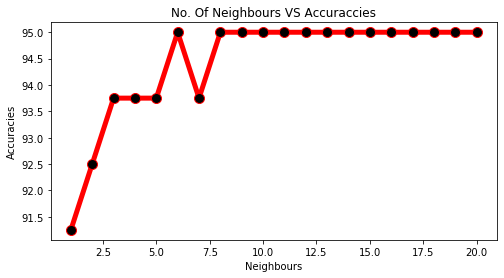

In [103]:
plt.figure(figsize = (8,4))
plt.plot(np.arange(1,21), np.array(accuracies), lw = 5, ms = 10, mfc = 'black', marker = 'o', color = 'red')
plt.title('No. Of Neighbours VS Accuraccies')
plt.xlabel('Neighbours')
plt.ylabel('Accuracies')